In [3]:
import pandas as pd
import missingno as msno
import numpy as np
import math as m
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics
from sklearn.ensemble import ExtraTreesClassifier

In [58]:
df=pd.read_csv('wineQualityReds.csv')
df.head()

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [59]:
df.columns

Index(['Unnamed: 0', 'fixed.acidity', 'volatile.acidity', 'citric.acid',
       'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
       'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [54]:
l = []
bandera = np.NAN
for column in df.columns:
    if df[column].dtype == np.int64:
        bandera = 'entero'
    elif df[column].dtype == np.float64:
        bandera = 'flotante'
    else:
        bandera = 'otro'
        
    try:
        df[column] =df[column].astype('int64')
    except:
        l.append(column)
        
    print('COLUMNA: ', column)
    print('TIPO: ', bandera)
    print('NUNIQUE: ', df[column].nunique())
    print('UNIQUE: ', df[column].unique())
    print('VALUE COUNTS ', df[column].value_counts())
    print('\n')

COLUMNA:  Unnamed: 0
TIPO:  entero
NUNIQUE:  1599
UNIQUE:  [   1    2    3 ... 1597 1598 1599]
VALUE COUNTS  1599    1
1050    1
1054    1
1056    1
1058    1
1060    1
1062    1
1064    1
1066    1
1068    1
1070    1
1072    1
1074    1
1076    1
1078    1
1080    1
1082    1
1084    1
1086    1
1088    1
1090    1
1092    1
1094    1
1052    1
1048    1
1098    1
1046    1
1004    1
1006    1
1008    1
       ..
589     1
591     1
593     1
595     1
553     1
549     1
503     1
547     1
505     1
507     1
509     1
511     1
513     1
515     1
517     1
519     1
521     1
523     1
525     1
527     1
529     1
531     1
533     1
535     1
537     1
539     1
541     1
543     1
545     1
2       1
Name: Unnamed: 0, Length: 1599, dtype: int64


COLUMNA:  fixed.acidity
TIPO:  flotante
NUNIQUE:  12
UNIQUE:  [ 7 11  6  5  8  4 10  9 12 15 13 14]
VALUE COUNTS  7     504
8     316
6     254
9     191
10    138
11     72
5      55
12     43
13     14
15      7
4       3
14      2


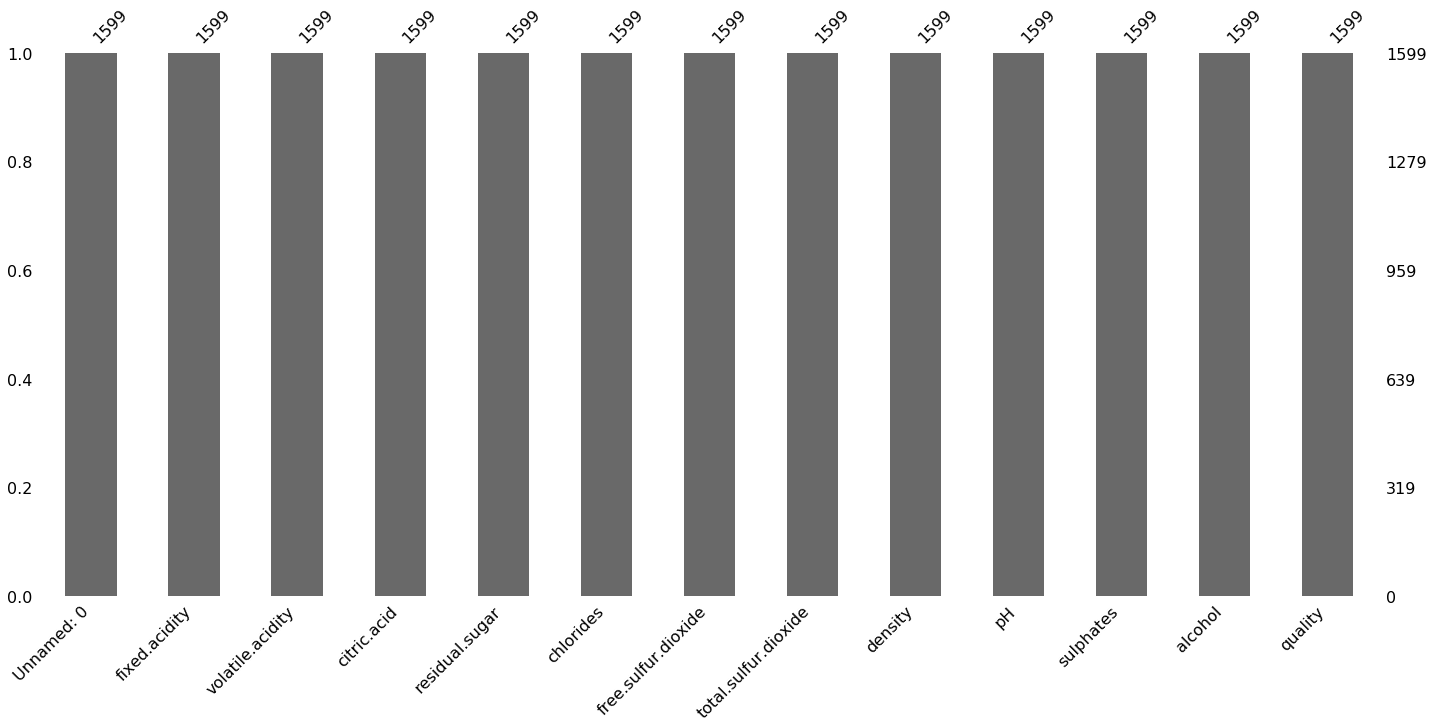

In [61]:
msno.bar(df)

In [56]:
all_variables = ['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'] 
features = ['volatile.acidity', 'citric.acid', 'residual.sugar',
       'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
target = ['quality']

In [62]:
#Normalizamos
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df[features]),
                 columns=features)
df_sc.head()

,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [63]:
#Componentes Principales
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df_sc[features]),
                     columns=features)
df_pca.head()

,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,-0.291142,0.171990,-0.166568,0.033076,-0.027517,-0.091408,-0.041409,-0.009797,-0.018536,0.023465
1,-0.251650,0.242051,0.047723,0.026979,0.140458,0.128519,0.061834,-0.069521,-0.021733,-0.021300
2,-0.208911,0.163710,-0.071564,0.009940,0.082234,0.068192,0.042299,-0.019219,-0.041466,0.006652
3,0.342741,0.048451,0.015070,-0.107319,-0.133499,0.012861,-0.029734,-0.011565,-0.014732,0.021156
4,-0.291142,0.171990,-0.166568,0.033076,-0.027517,-0.091408,-0.041409,-0.009797,-0.018536,0.023465


In [64]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.31191478, 0.21990967, 0.16587817, 0.07511566, 0.05888216,
       0.0551238 , 0.0403364 , 0.02993727, 0.02704141, 0.01586069])

In [65]:
df_pca['quality'] = df[target]
df_pca.columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','quality']
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,quality
0,-0.291142,0.171990,-0.166568,0.033076,-0.027517,-0.091408,-0.041409,-0.009797,-0.018536,0.023465,5
1,-0.251650,0.242051,0.047723,0.026979,0.140458,0.128519,0.061834,-0.069521,-0.021733,-0.021300,5
2,-0.208911,0.163710,-0.071564,0.009940,0.082234,0.068192,0.042299,-0.019219,-0.041466,0.006652,5
3,0.342741,0.048451,0.015070,-0.107319,-0.133499,0.012861,-0.029734,-0.011565,-0.014732,0.021156,6
4,-0.291142,0.171990,-0.166568,0.033076,-0.027517,-0.091408,-0.041409,-0.009797,-0.018536,0.023465,5


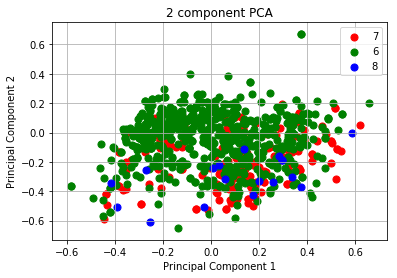

In [66]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = [7, 6, 8]
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = df_pca['quality'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'PC1']
    , df_pca.loc[indicesToKeep, 'PC2']
    , c = color
    , s = 50)
ax.legend(targets)
ax.grid()

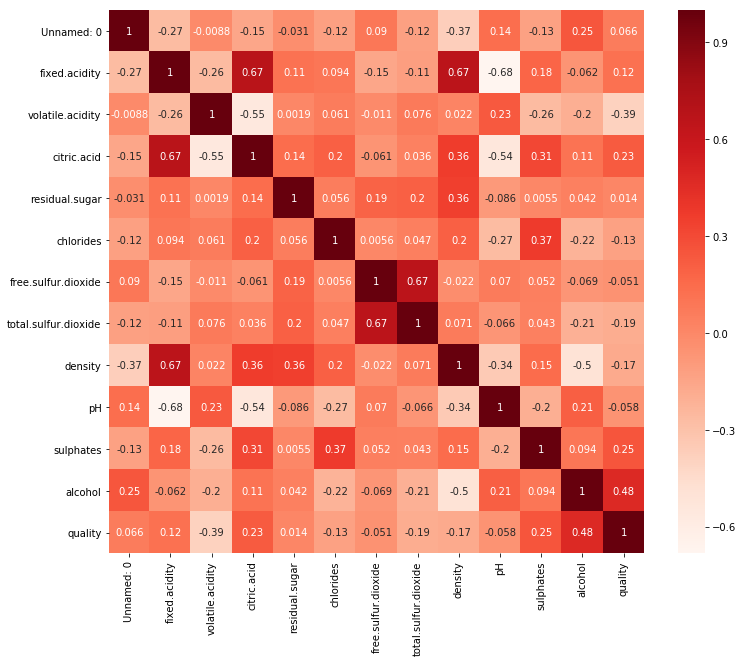

In [51]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [52]:
cor_target = abs(cor["quality"])

#Selección de características altamente correlacionadas
relevant_features = cor_target[cor_target>0.2]
relevant_features

volatile.acidity    0.390558
citric.acid         0.226373
sulphates           0.251397
alcohol             0.476166
quality             1.000000
Name: quality, dtype: float64

In [331]:
clus = AgglomerativeClustering(n_clusters=5,linkage="ward").fit(df_sc)

In [332]:
md_h = pd.Series(clus.labels_)
md_h

0       2
1       2
2       2
3       3
4       2
5       2
6       2
7       2
8       2
9       1
10      2
11      1
12      2
13      0
14      1
15      1
16      1
17      0
18      2
19      0
20      1
21      1
22      2
23      2
24      2
25      2
26      2
27      2
28      2
29      2
       ..
1569    4
1570    0
1571    4
1572    1
1573    4
1574    3
1575    0
1576    0
1577    4
1578    4
1579    4
1580    0
1581    4
1582    4
1583    1
1584    0
1585    0
1586    0
1587    4
1588    4
1589    1
1590    4
1591    4
1592    4
1593    2
1594    4
1595    4
1596    4
1597    4
1598    0
Length: 1599, dtype: int64

Text(0, 0.5, 'Número de vinos del cluster')

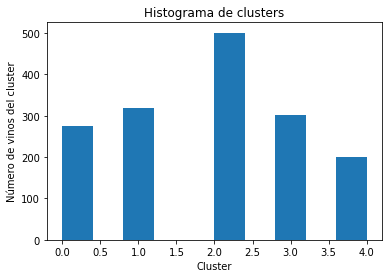

In [333]:
plt.hist(md_h)
plt.title("Histograma de clusters")
plt.xlabel("Cluster")
plt.ylabel("Número de vinos del cluster")

In [334]:
clus.children_

array([[   0,    4],
       [1265, 1266],
       [1339, 1340],
       ...,
       [3189, 3192],
       [3190, 3193],
       [3194, 3195]])

In [335]:
model = KMeans(n_clusters=5)
model.fit(df_sc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [336]:
model.labels_

array([2, 2, 2, ..., 3, 3, 4], dtype=int32)

In [337]:
md_k = pd.Series(model.labels_)
df_sc["clust_k"]=md_k
df_sc.head()

,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,clust_k
0,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,2
1,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,2
2,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,2
3,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0
4,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,2


(array([275.,   0., 303.,   0.,   0., 501.,   0., 320.,   0., 200.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

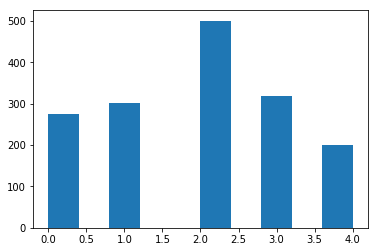

In [324]:
plt.hist(md_k)

In [325]:
model.cluster_centers_

array([[1.75217933e-01, 4.35309091e-01, 1.03424658e-01, 1.54688117e-01,
        1.68758003e-01, 9.97237392e-02, 4.02264050e-01, 4.00343593e-01,
        2.66477953e-01, 4.76363636e-01, 1.88727273e+00],
       [1.98799674e-01, 4.90066007e-01, 1.30962069e-01, 1.26475920e-01,
        1.35174081e-01, 9.55929515e-02, 6.32984884e-01, 3.52927419e-01,
        2.22584534e-01, 2.78530930e-01, 4.00000000e+00],
       [3.59739425e-01, 1.10079840e-01, 9.20556148e-02, 1.22209671e-01,
        1.44766804e-01, 1.03827680e-01, 4.90458144e-01, 4.87560312e-01,
        1.57134832e-01, 2.21904908e-01, 6.21724894e-15],
       [2.84471318e-01, 2.92250000e-01, 1.45590753e-01, 1.26392947e-01,
        3.85145246e-01, 2.95958481e-01, 5.38514134e-01, 4.37623031e-01,
        1.80295659e-01, 2.19070513e-01, 3.00000000e+00],
       [3.34828767e-01, 8.21000000e-02, 9.32534247e-02, 9.45993322e-02,
        2.59295775e-01, 1.27685512e-01, 3.16934655e-01, 5.88622047e-01,
        1.85269461e-01, 5.04910256e-01, 5.00000000e+

In [326]:
df_sc.groupby("clust_k").mean()

,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
clust_k,,,,,,,,,,
0,0.175218,0.435309,0.103425,0.154688,0.168758,0.099724,0.402264,0.400344,0.266478,0.476364
1,0.198800,0.490066,0.130962,0.126476,0.135174,0.095593,0.632985,0.352927,0.222585,0.278531
2,0.359739,0.110080,0.092056,0.122210,0.144767,0.103828,0.490458,0.487560,0.157135,0.221905
3,0.284471,0.292250,0.145591,0.126393,0.385145,0.295958,0.538514,0.437623,0.180296,0.219071
4,0.334829,0.082100,0.093253,0.094599,0.259296,0.127686,0.316935,0.588622,0.185269,0.504910
